In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
nums=np.arange(7)+3
nums2=np.arange(6)+3

dims=np.loadtxt('questruntime/dim.dat')
sruntimes=np.loadtxt('questruntime/sruntime.dat')
cruntimes=np.loadtxt('questruntime/cruntime.dat')
eruntimes=np.loadtxt('questruntime/eruntimes.dat')
pruntimes=np.loadtxt('questruntime/pruntime.dat')


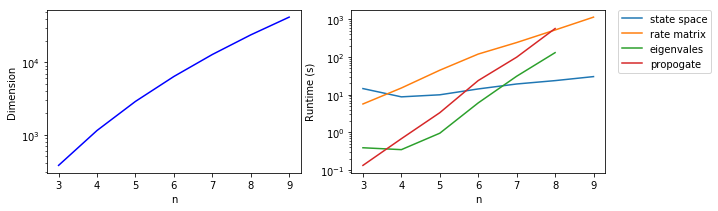

In [6]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.semilogy(nums,dims, 'b-')
plt.xlabel("n")
plt.ylabel("Dimension")
plt.subplot(122)
plt.semilogy(nums,sruntimes, label="state space")
plt.semilogy(nums,cruntimes, label="rate matrix")
plt.semilogy(nums2,eruntimes, label="eigenvales")
plt.semilogy(nums2,pruntimes, label="propogate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.show()

In [14]:
a,b=np.polyfit(nums2,np.log(pruntimes),1)
print(pruntimes)
print([np.exp(b+a*n) for n in range(16)])
print((np.log(60*60*24)-b)/a)

[1.33800563e-01 6.82605433e-01 3.34178077e+00 2.37806982e+01
 9.91367231e+01 5.69858516e+02]
[0.000852488173843288, 0.004558593192166018, 0.024376610173928896, 0.1303514260919058, 0.6970408995737324, 3.727354814944579, 19.931648092653912, 106.582446644619, 569.9387165549986, 3047.688909895736, 16297.204281269616, 87147.63062694612, 466013.02854252205, 2491956.9380033803, 13325484.48330889, 71256663.39049146]
10.994861113527548


/Users/zack/anaconda2/envs/cantera_env/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


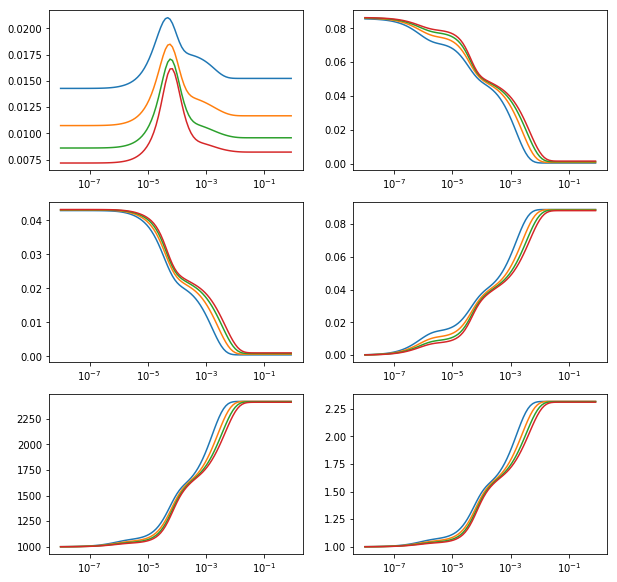

In [8]:
plt.figure(figsize=(10, 10))

n=3
while n<=6:
    filebase="data/h2o2/"+str(n)+"/"
    propogate=np.load(filebase+"propogate.npy")
    temperatures=np.load(filebase+"temperatures.npy")
    pressures=np.load(filebase+"pressures.npy")
    times=np.load(filebase+"times.npy")
    multiindices=np.load(filebase+"multiindices.npy")
    spatoms=np.load(filebase+"spatoms.npy")
    plt.subplot(321)
    plt.semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1))
    plt.subplot(322)
    plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1))
    plt.subplot(323)
    plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1))
    plt.subplot(324)
    plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1))
    plt.subplot(325)
    plt.semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1))
    plt.subplot(326)
    plt.semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1))
    n=n+1
plt.show()